In [1]:
# coding:utf-8
%matplotlib inline
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tenma import dataload, abilitymodel as am, comparemodel as cm

YEAR = "2018"
MONTHDAY = "1014"
JYOCD = "08"
RACENUM = "11"

N = 100
cols = list(map(lambda x: "score_%d" % x, range(N)))
df = dataload.load()


mask = ((df['year'] == YEAR)
        & (df['monthday'] == MONTHDAY)
        & (df['jyocd'] == JYOCD)
        & (df['racenum'] == RACENUM))

df = pd.merge(
    df[mask][['kettonum']],
    df
)

mask = ((df['year'] == YEAR)
        & (df['monthday'] == MONTHDAY)
        & (df['jyocd'] == JYOCD)
        & (df['racenum'] == RACENUM))

df['am_predict'] = am.predict(df)

result = []
for i in range(N):
    result.append(cm.predict(df))

2015104126 サトノガーネット
2015104925 ダンサール
2015103383 ミッキーチャーム
2015105193 オスカールビー
2015105843 サヤカチャン
2015102382 オールフォーラヴ
2015104542 ハーレムライン
2015104183 ラテュロス
2015104352 ゴージャスランチ
2015110077 ランドネ
2015100600 スカーレットカラー
2015104664 パイオニアバイオ
2015104513 トーセンブレス
2015104793 サラキア
2015105036 プリモシーン
2015103350 カンタービレ
2015104961 アーモンドアイ
2015105046 ラッキーライラック


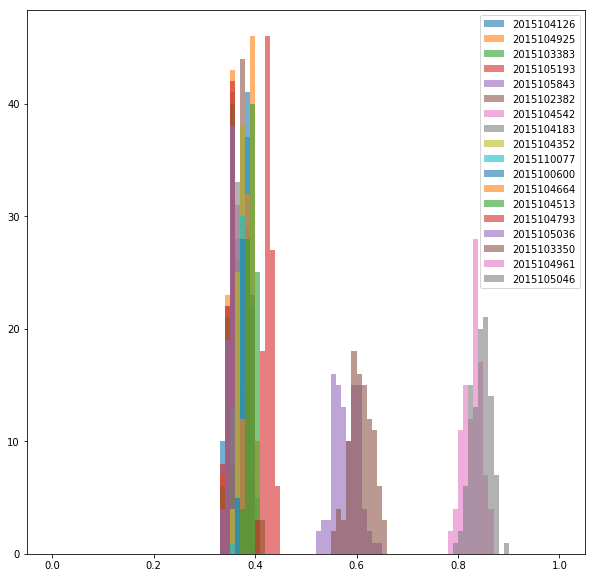

In [2]:
df_result = pd.concat([
    df[mask][['kettonum', 'bamei', 'am_predict']],
    pd.DataFrame(result).T.rename(columns=dict(zip((map(int, range(N))), cols)))[mask]
], axis=1).sort_values('am_predict')

plt.figure(figsize=(10, 10))
for i, row in df_result.iterrows():
    print(row['kettonum'], row['bamei'])
    plt.hist(row[cols].tolist(), range=(0, 1), bins=100, alpha=0.6, label=row['kettonum'])
    plt.legend()
plt.show()